In [1]:
import tensorflow as tf

In [2]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(1, 2)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 6)              18        
                                                                 
 dense_1 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_2 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_3 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_4 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_5 (Dense)             (None, 1, 1)              7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (7

In [12]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
# Print the dataset
dataset = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "y":y})
dataset

,X0,X1,y
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0
...,...,...,...
995,0.810647,0.527220,0
996,-0.162279,0.912738,0
997,1.684259,-0.348223,1
998,-0.967201,0.263672,0


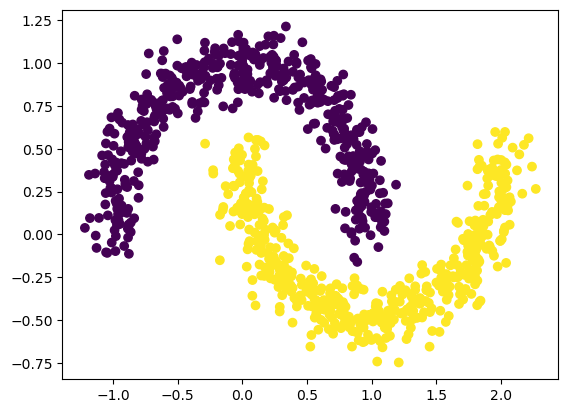

In [14]:
# Visualize our dataset

plt.scatter(X[:, 0], X[:, 1], c=y)

In [15]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Create a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.6819 - accuracy: 0.5550 - val_loss: 0.6720 - val_accuracy: 0.7950
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.8025 - val_loss: 0.6497 - val_accuracy: 0.8400
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.8400 - val_loss: 0.6240 - val_accuracy: 0.8600
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.8612 - val_loss: 0.6015 - val_accuracy: 0.8550
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5833 - accuracy: 0.8612 - val_loss: 0.5790 - val_accuracy: 0.8550
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.8650 - val_loss: 0.5576 - val_accuracy: 0.8550
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5378 - accuracy: 0.8662 - val_loss: 0.5373 - val_accuracy: 0.8500
Epoch 8/100
